In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
msa_1995=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_1995_jumbo.xlsx')

In [4]:
msa_2019=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_2019_jumbo.xlsx')

In [5]:
msa_1995.head()

,FEDERAL-AID URBANIZED AREA,TOTAL ROADWAY MILES,"TOTAL DVMT (1,000)","ESTIMATED POPULATION (1,000)",NET LAND AREA (SQ. MILES),PERSONS PER SQUARE MILE,"MILES OF ROADWAY PER 1,000 PERSONS",TOTAL DVMT PER CAPITA,TOTAL MILES OF FREEWAYS,"TOTAL FREEWAY DVMT (1,000)",% OF TOTAL MILES SERVING AS FREEWAYS,% OF TOTAL DVMT SERVED BY FREEWAYS,ANNUAL AVERAGE DAILY TRAFFIC ON FREEWAYS,TOTAL ESTIMATED FREEWAY LANE MILES,AVERAGE DAILY TRAFFIC PER FREEWAY LANE
0,NEW YORK-NORTHEASTERN NJ,37066,238625,16269,3962,4106,2.2,14.6,1146,91414,3.0,38.3,79767,6491,14083
1,LOS ANGELES,26320,262809,12089,2226,5430,2.1,21.7,628,115063,2.3,43.7,183221,5209,22089
2,CHICAGO-NORTHWESTERN IN,23644,148659,7746,2731,2836,3.0,19.1,475,44488,2.0,29.9,93658,2618,16993
3,PHILADELPHIA,13383,74122,4531,1350,3356,2.9,16.3,351,21280,2.6,28.7,60626,1739,12236
4,SAN FRANCISCO-OAKLAND,9270,80831,3836,1152,3329,2.4,21.0,332,42329,3.5,52.3,127496,2252,18796


In [6]:
msa_1995['name_lower']=msa_1995['FEDERAL-AID URBANIZED AREA'].str.lower()
msa_1995['name_final'] = msa_1995['name_lower'].str.split('-').str[0]
msa_1995['name']=msa_1995['name_final'].str.rstrip()

In [7]:
msa_2019['name_lower']=msa_2019['FEDERAL AID URBANIZED AREA'].str.lower()
msa_2019['name_strip'] = msa_2019['name_lower'].str.split('-').str[0]
msa_2019['name_final'] = msa_2019['name_strip'].str.split(',').str[0]
msa_2019['name'] = msa_2019['name_final'].replace(' ', '')

In [8]:
msa_1995.drop_duplicates(subset=['name'],inplace=True)

In [9]:
msa_2019.drop_duplicates(subset=['name'],inplace=True)

In [10]:
msa_1995 = msa_1995[msa_1995['TOTAL ESTIMATED FREEWAY LANE MILES'] != 0]
msa_2019 = msa_2019[msa_2019['TOTAL ESTIMATED FREEWAY LANE MILES'] != 0]

In [11]:
msajoin=msa_1995.merge(msa_2019,how='inner',on='name')

In [12]:
msajoin['LMgrowth']=(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_y']-msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])/(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])
msajoin['PREDICTED_VMT']=msajoin['TOTAL FREEWAY DVMT (1,000)_x']*((1+msajoin['LMgrowth'])*1.03)

<AxesSubplot:xlabel='TOTAL FREEWAY DVMT (1,000)_y', ylabel='PREDICTED_VMT'>

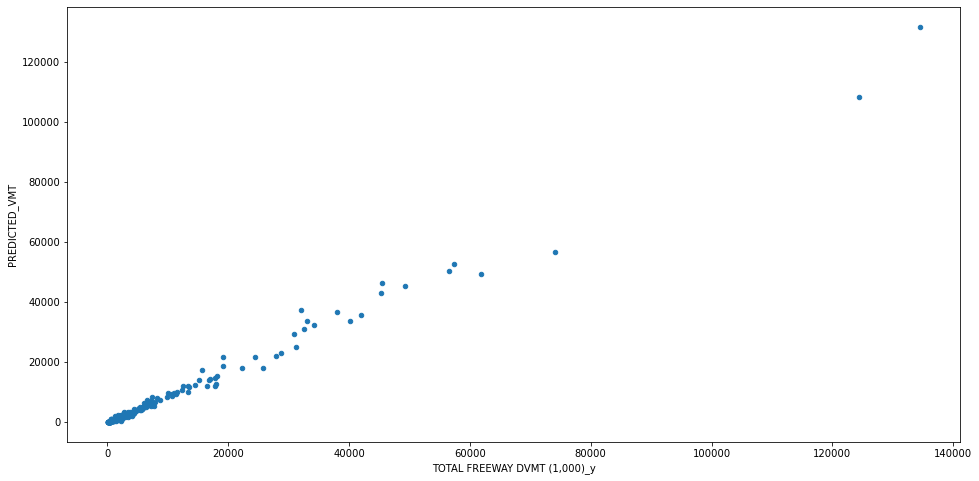

In [13]:
msajoin.plot('TOTAL FREEWAY DVMT (1,000)_y','PREDICTED_VMT',kind='scatter',figsize=(16,8))

In [14]:
np.corrcoef(msajoin['TOTAL FREEWAY DVMT (1,000)_y'],msajoin['PREDICTED_VMT'])

array([[1.        , 0.99445081],
       [0.99445081, 1.        ]])

In [15]:
msajoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   FEDERAL-AID URBANIZED AREA                  302 non-null    object 
 1   TOTAL ROADWAY MILES_x                       302 non-null    int64  
 2   TOTAL DVMT (1,000)_x                        302 non-null    int64  
 3   ESTIMATED POPULATION (1,000)_x              302 non-null    int64  
 4   NET LAND AREA (SQ. MILES)_x                 302 non-null    int64  
 5   PERSONS PER SQUARE MILE_x                   302 non-null    int64  
 6   MILES  OF ROADWAY PER  1,000 PERSONS        302 non-null    float64
 7   TOTAL DVMT PER CAPITA_x                     302 non-null    float64
 8   TOTAL MILES OF FREEWAYS_x                   302 non-null    int64  
 9   TOTAL FREEWAY DVMT (1,000)_x                302 non-null    int64  
 10  %  OF TOTAL MI

In [16]:
msajoin['Real_VMT_change']=(msajoin['TOTAL FREEWAY DVMT (1,000)_y']-msajoin['TOTAL FREEWAY DVMT (1,000)_x'])/msajoin['TOTAL FREEWAY DVMT (1,000)_x']

In [17]:
msajoin['Predicted_VMT_change']=(msajoin['PREDICTED_VMT']-msajoin['TOTAL FREEWAY DVMT (1,000)_x'])/msajoin['TOTAL FREEWAY DVMT (1,000)_x']

<AxesSubplot:xlabel='Real_VMT_change', ylabel='Predicted_VMT_change'>

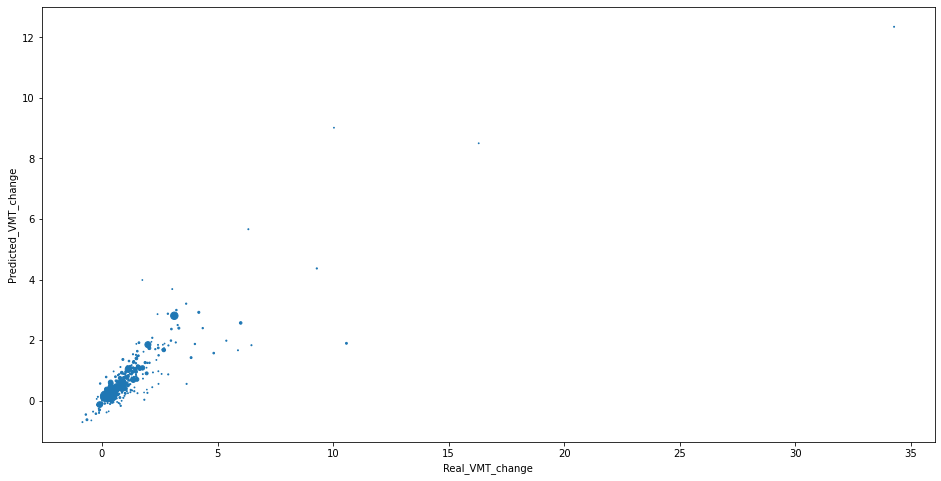

In [18]:
msajoin.plot('Real_VMT_change','Predicted_VMT_change',kind='scatter',figsize=(16,8),s=(msajoin['ESTIMATED POPULATION (1,000)_y']*0.00001))

In [19]:
np.corrcoef(msajoin['Real_VMT_change'],msajoin['Predicted_VMT_change'])

array([[1.        , 0.87089349],
       [0.87089349, 1.        ]])

In [20]:
msajoin.iloc[264]

FEDERAL-AID URBANIZED AREA                        LONGMONT
TOTAL ROADWAY MILES_x                                  259
TOTAL DVMT (1,000)_x                                   694
ESTIMATED POPULATION (1,000)_x                          62
NET LAND AREA (SQ. MILES)_x                             19
PERSONS PER SQUARE MILE_x                             3263
MILES  OF ROADWAY PER  1,000 PERSONS                   4.1
TOTAL DVMT PER CAPITA_x                               11.1
TOTAL MILES OF FREEWAYS_x                                1
TOTAL FREEWAY DVMT (1,000)_x                            14
%  OF TOTAL MILES SERVING AS FREEWAYS                  0.3
%  OF TOTAL DVMT SERVED BY FREEWAYS                    2.0
ANNUAL AVERAGE DAILY TRAFFIC ON FREEWAYS_x           14000
TOTAL ESTIMATED FREEWAY LANE MILES_x                     4
AVERAGE DAILY TRAFFIC PER FREEWAY LANE_x              3500
name_lower_x                                      longmont
name_final_x                                      longmo

<AxesSubplot:xlabel='LMgrowth', ylabel='TOTAL DVMT PER CAPITA_y'>

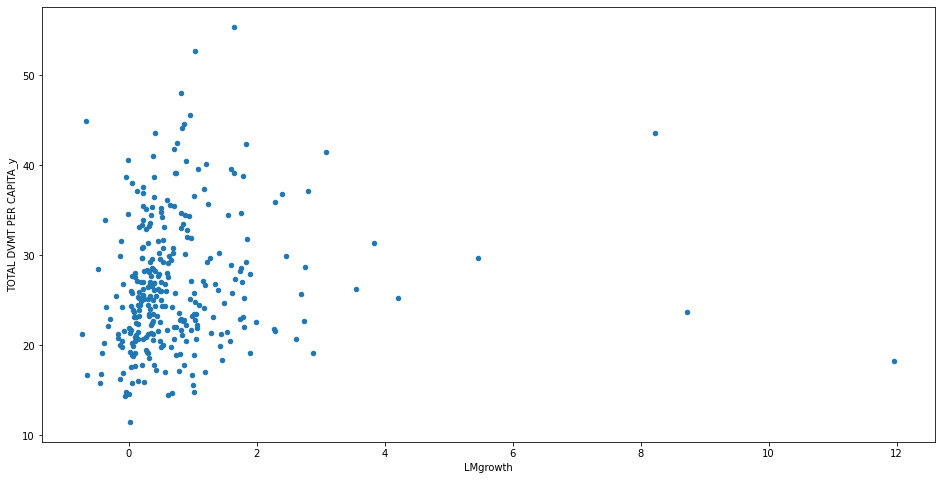

In [22]:
msajoin.plot('LMgrowth','TOTAL DVMT PER CAPITA_y',kind='scatter',figsize=(16,8))

In [23]:
np.corrcoef(msajoin['LMgrowth'],msajoin['TOTAL DVMT PER CAPITA_y'])

array([[1.        , 0.11782617],
       [0.11782617, 1.        ]])